# Morris Sensitivity Analysis Explainer Demo

In [2]:
import os
import logging

import datatable
import daimojo

from h2o_sonar import interpret
from h2o_sonar.lib.api import commons
from h2o_sonar.lib.api import explainers
from h2o_sonar.explainers import morris_sa_explainer as explainer
from h2o_sonar.lib.api.models import ModelApi

In [3]:
# explainer description
interpret.describe_explainer(explainer.MorrisSensitivityAnalysisExplainer)

{'id': 'h2o_sonar.explainers.morris_sa_explainer.MorrisSensitivityAnalysisExplainer',
 'name': 'MorrisSensitivityAnalysisExplainer',
 'description': 'Morris sensitivity analysis (SA) explainer provides Morris sensitivity analysis based feature importance which is a measure of the contribution of an input variable to the overall predictions of the model. In applied statistics, the Morris method for global sensitivity analysis is a so-called one-step-at-a-time method (OAT), meaning that in each run only one input parameter is given a new value. This explainer is based based on InterpretML library - see http://interpret.ml',
 'model_types': ['iid'],
 'can_explain': ['regression', 'binomial'],
 'explanation_scopes': ['global_scope'],
 'explanations': [{'explanation_type': 'global-feature-importance',
   'name': 'GlobalFeatImpExplanation',
   'category': None,
   'scope': 'global',
   'has_local': None,
   'formats': []}],
 'parameters': [],
 'keywords': []}

## Interpretation

In [4]:
# dataset
dataset_path = "../../data/pd_ice_creditcard_train.csv"
target_col = "LIMIT_BAL"

# model
mojo_path = "../../data/models/creditcard-regression.mojo"
mojo_model = daimojo.model(mojo_path)
model = ModelApi().create_model(
    model_src=mojo_model,
    target_col=target_col,
    used_features=list(mojo_model.feature_names),
)

# results
results_location = "./results"
os.makedirs(results_location, exist_ok=True)

/home/dvorka/h/mli/git/h2o-sonar/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is not" with a literal. Did you mean "!="?
"is not" with a literal. Did you mean "!="?
ExplainableDataset cleaner: label encoded ['SEX', 'EDUCATION', 'MARRIAGE'] columns


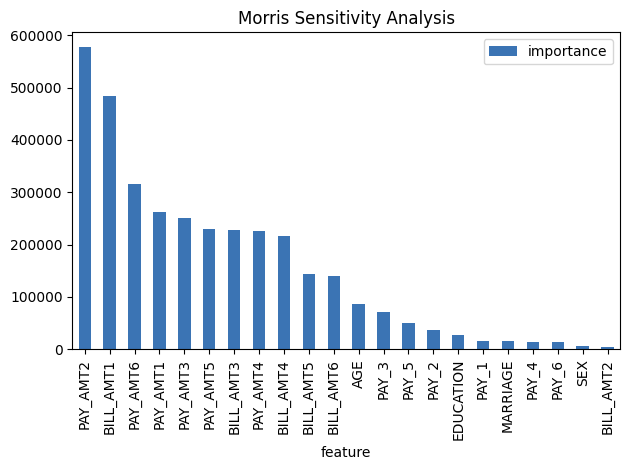

In [5]:
interpretation = interpret.run_interpretation(
    dataset=dataset_path,
    model=model,
    target_col=target_col,
    results_location=results_location,
    explainers=[explainer.MorrisSensitivityAnalysisExplainer.explainer_id()],
    log_level=logging.INFO,
)

## Explainer Result

In [6]:
# retrieve the result
result = interpretation.get_explainer_result(
    explainer.MorrisSensitivityAnalysisExplainer.explainer_id()
)

### Display Data

In [7]:
result.data()

<Frame#7fe9a67c5a80 22x2>

### Plot Sensitivity Analysis Data

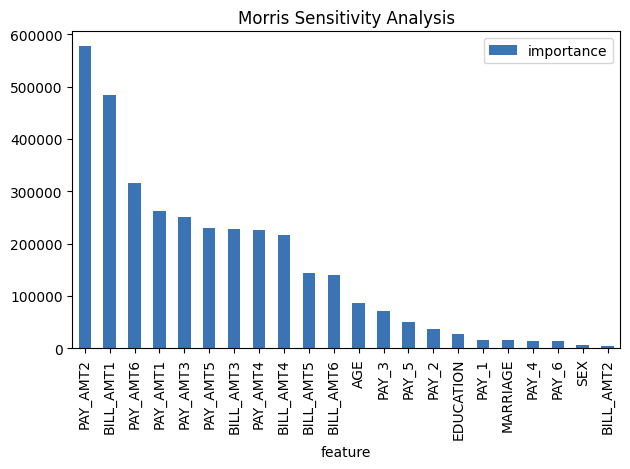

In [8]:
result.plot()

### Save Explainer Log and Data

In [9]:
# save the explainer log
log_file_path = "./morris-sa-demo.log"
result.log(path=log_file_path)

In [10]:
!cat $log_file_path

In [12]:
# save the explainer data
result.zip(file_path="./morris-sa-demo-archive.zip")

In [13]:
!unzip -l morris-sa-demo-archive.zip

Archive:  morris-sa-demo-archive.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
     1544  2022-09-19 15:58   explainer_h2o_sonar_explainers_morris_sa_explainer_MorrisSensitivityAnalysisExplainer_508d6cc9-79af-4d42-be00-8db7cf404599/result_descriptor.json
      110  2022-09-19 15:58   explainer_h2o_sonar_explainers_morris_sa_explainer_MorrisSensitivityAnalysisExplainer_508d6cc9-79af-4d42-be00-8db7cf404599/global_html_fragment/text_html.meta
      367  2022-09-19 15:58   explainer_h2o_sonar_explainers_morris_sa_explainer_MorrisSensitivityAnalysisExplainer_508d6cc9-79af-4d42-be00-8db7cf404599/global_html_fragment/text_html/explanation.html
    27825  2022-09-19 15:58   explainer_h2o_sonar_explainers_morris_sa_explainer_MorrisSensitivityAnalysisExplainer_508d6cc9-79af-4d42-be00-8db7cf404599/global_html_fragment/text_html/fi-class-0.png
        0  2022-09-19 15:58   explainer_h2o_sonar_explainers_morris_sa_explainer_MorrisSensitivityAnalysisExplainer_508d6cc9-79a